In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
from geopandas import GeoDataFrame

# We are going to use a couple classes to manage our data and methods
import sys
sys.path.insert(1, '../src')
from classes import data, data_un_Agg
# until I integrate into class, use this for scatter plots:
from functions import scatter, plot_subgroup_hist

%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
plt.style.use('seaborn-white')

# for testing
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from classes import data, data_un_Agg

In [3]:
#the unaggregated data we compiled in the EDA notebook
data = pd.read_csv('../data/prices_CBSA_vaca_construction_pop.csv')
dataobj = data_un_Agg(data, 2019)

/usr/local/anaconda3/envs/realty-market-app/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataobj.df.head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,month_date,house_price,rent_price,pop_2019_est,vacancy_pct,construction_19_Q2
0,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-01,"241,373.0000","1,210.0000",703479,3.6000,945.0000
1,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-02,"242,013.0000","1,234.0000",703479,3.6000,945.0000
2,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-03,"242,620.0000","1,241.0000",703479,3.6000,945.0000
3,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-04,"243,485.0000","1,270.0000",703479,3.6000,945.0000
4,10420,Metropolitan Statistical Area,"Akron, OH",44256,OH,2019-05,"244,326.0000","1,260.0000",703479,3.6000,945.0000


In [5]:
dataobj

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38816 entries, 0 to 38815
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                38816 non-null  object 
 1   CBSA_type           38816 non-null  object 
 2   CBSA_name           38816 non-null  object 
 3   zip_code            38816 non-null  object 
 4   state               38816 non-null  object 
 5   month_date          38816 non-null  object 
 6   house_price         38816 non-null  float64
 7   rent_price          38816 non-null  float64
 8   pop_2019_est        38816 non-null  int64  
 9   vacancy_pct         35805 non-null  float64
 10  construction_19_Q2  35805 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 3.3+ MB


This is a pd object from 2019 with: None

In [6]:
dataobj.uniq_len('zip_code')

'The number of zip_code is: 3223'

In [7]:
# do we have any nulls?
dataobj.nulls
# thats ok, once we get means we should have rent data (some months there isn't any)

CBSA                  3011
CBSA_type             3011
CBSA_name             3011
zip_code              3011
state                 3011
month_date            3011
house_price           3011
rent_price            3011
pop_2019_est          3011
vacancy_pct              0
construction_19_Q2       0
dtype: int64

In [8]:
agg_zip = dataobj.agg_by_zip()

In [9]:
agg_zip

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                3302 non-null   object 
 1   CBSA_type           3302 non-null   object 
 2   CBSA_name           3302 non-null   object 
 3   zip_code            3302 non-null   object 
 4   state               3302 non-null   object 
 5   house_price         3302 non-null   float64
 6   house_priceSD       3302 non-null   float64
 7   rent_price          3302 non-null   float64
 8   rent_priceSD        3302 non-null   float64
 9   rent_priceN         3302 non-null   int64  
 10  pop_2019_est        3302 non-null   int64  
 11  vacancy_pct         3045 non-null   float64
 12  construction_19_Q2  3045 non-null   float64
 13  rent_pct            3302 non-null   float64
 14  rent_CV             3302 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 387.1+

This is a pd object from 2019 with: None

In [10]:
agg_zip.uniq_len('CBSA')

'The number of CBSA is: 124'

In [11]:
# some of these rents are crazy!
agg_zip.df.sort_values('rent_priceSD', ascending=False).head()

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct,rent_CV
2010,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",7760,NJ,"1,143,862.5000","2,687.6848","4,470.7000",541.2161,10,19216182,4.6000,"61,168.0000",0.3908,0.1211
2011,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",7762,NJ,"1,054,638.0000","1,914.3342","3,212.7500",488.7524,4,19216182,4.6000,"61,168.0000",0.3046,0.1521
2831,41860,Metropolitan Statistical Area,"San Francisco-Oakland-Berkeley, CA",94920,CA,"2,818,724.5833","14,510.6589","6,233.5000",386.3102,12,4731803,4.7000,"13,881.0000",0.2211,0.0620
2008,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",7740,NJ,"391,564.1667","2,414.4945","2,012.0000",335.3195,6,19216182,4.6000,"61,168.0000",0.5138,0.1667
2330,38060,Metropolitan Statistical Area,"Phoenix-Mesa-Chandler, AZ",85266,AZ,"742,916.1000","12,932.2880","3,312.4000",300.3410,10,4948203,5.6000,"35,873.0000",0.4459,0.0907


In [12]:
agg_zip.df.describe()

,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct,rent_CV
count,"3,302.0000","3,302.0000","3,302.0000","3,302.0000","3,302.0000","3,302.0000","3,045.0000","3,045.0000","3,302.0000","3,302.0000"
mean,"473,274.6938","5,519.4224","1,773.9029",41.8089,11.7553,"5,418,651.4134",6.5220,"24,114.6966",0.5134,0.0234
std,"460,701.9794","8,926.1508",681.6929,32.7960,0.8903,"4,895,913.4393",2.6869,"17,880.5221",0.2459,0.0137
min,"24,989.5833",165.1476,537.1818,6.5436,2.0000,"27,511.0000",1.5000,757.0000,0.0445,0.0041
25%,"228,941.7292","1,987.9380","1,343.2386",23.5424,12.0000,"2,122,271.0000",4.6000,"9,721.0000",0.3667,0.0154
50%,"335,274.8750","3,193.9082","1,616.7083",33.2661,12.0000,"3,979,845.0000",5.9000,"20,688.0000",0.4856,0.0205
75%,"545,608.5446","5,589.2487","2,034.5000",49.1537,12.0000,"6,280,487.0000",7.6000,"30,554.0000",0.6223,0.0276
max,"5,608,781.8333","106,280.4858","8,506.1818",541.2161,12.0000,"19,216,182.0000",15.8000,"63,672.0000",3.2047,0.2407


In [13]:
# drop no rent data
agg_zip.drop

In [14]:
agg_zip.uniq_len('zip_code')

'The number of zip_code is: 3223'

# Examine by zip code

## zip codes tables

In [15]:
# not too bad
agg_zip.df[agg_zip.df['rent_CV'] > 0.15]

,CBSA,CBSA_type,CBSA_name,zip_code,state,house_price,house_priceSD,rent_price,rent_priceSD,rent_priceN,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct,rent_CV
1168,27260,Metropolitan Statistical Area,"Jacksonville, FL",32206,FL,"55,115.6667",437.7674,758.6667,182.5824,3,1559514,6.9000,"14,687.0000",1.3765,0.2407
2008,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",7740,NJ,"391,564.1667","2,414.4945","2,012.0000",335.3195,6,19216182,4.6000,"61,168.0000",0.5138,0.1667
2011,35620,Metropolitan Statistical Area,"New York-Newark-Jersey City, NY-NJ-PA",7762,NJ,"1,054,638.0000","1,914.3342","3,212.7500",488.7524,4,19216182,4.6000,"61,168.0000",0.3046,0.1521


In [16]:
### table of rent pct variation
## table of number of zip codes in CBSA and variation
agg_zip_var = agg_zip.df.groupby(['CBSA_name']).agg(
    zip_codes_num = ('zip_code', 'count'),
    min_house_price = ('house_price', 'min'),
    max_house_price = ('house_price', 'max'),
    min_rent_price = ('rent_price', 'min'),
    max_rent_price = ('rent_price', 'max'),
).reset_index()
top5zipnum = agg_zip_var.sort_values(by='zip_codes_num', ascending=False).head(5)

In [17]:
# save for markdown
print(top5zipnum.to_markdown(showindex=False, floatfmt=",.2f", numalign="right"))

| CBSA_name                                    |   zip_codes_num |   min_house_price |   max_house_price |   min_rent_price |   max_rent_price |
|:---------------------------------------------|----------------:|------------------:|------------------:|-----------------:|-----------------:|
| Los Angeles-Long Beach-Anaheim, CA           |             219 |        257,736.25 |      3,659,961.00 |         1,449.08 |         8,506.18 |
| New York-Newark-Jersey City, NY-NJ-PA        |             215 |        178,553.33 |      5,608,781.83 |         1,287.25 |         7,014.58 |
| Miami-Fort Lauderdale-Pompano Beach, FL      |             142 |        169,412.08 |      2,467,936.17 |         1,200.33 |         4,264.08 |
| Chicago-Naperville-Elgin, IL-IN-WI           |             139 |         51,841.91 |      1,200,853.58 |           852.00 |         3,152.73 |
| Washington-Arlington-Alexandria, DC-VA-MD-WV |             125 |        205,120.67 |      1,510,548.17 |         1,242.27 |     

In [18]:
### Get table of top 10 zip codes
top10zip = agg_zip.df.loc[:,['zip_code', 'CBSA_name', 'house_price', 'rent_price', 'rent_pct']].sort_values(by='rent_pct', ascending=False).head(10)
top10zip = top10zip.round(2)
top10zip

,zip_code,CBSA_name,house_price,rent_price,rent_pct
928,48205,"Detroit-Warren-Dearborn, MI","24,989.5800",800.8300,3.2000
228,21223,"Baltimore-Columbia-Towson, MD","43,384.2500","1,226.5800",2.8300
935,48228,"Detroit-Warren-Dearborn, MI","31,398.6700",883.1700,2.8100
583,60636,"Chicago-Naperville-Elgin, IL-IN-WI","53,081.0800","1,298.3300",2.4500
934,48227,"Detroit-Warren-Dearborn, MI","33,044.5800",796.5000,2.4100
627,44105,"Cleveland-Elyria, OH","33,844.5000",783.2500,2.3100
2210,19132,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","45,085.3300","1,034.9200",2.3000
2663,63136,"St. Louis, MO-IL","39,071.9200",854.4200,2.1900
932,48224,"Detroit-Warren-Dearborn, MI","37,301.7500",806.8300,2.1600
573,60621,"Chicago-Naperville-Elgin, IL-IN-WI","51,841.9100","1,085.0900",2.0900


In [19]:
# save as markdown for readme
print(top10zip.to_markdown(showindex=False, floatfmt=",.2f", numalign="right"))

|   zip_code | CBSA_name                                   |   house_price |   rent_price |   rent_pct |
|-----------:|:--------------------------------------------|--------------:|-------------:|-----------:|
|      48205 | Detroit-Warren-Dearborn, MI                 |     24,989.58 |       800.83 |       3.20 |
|      21223 | Baltimore-Columbia-Towson, MD               |     43,384.25 |     1,226.58 |       2.83 |
|      48228 | Detroit-Warren-Dearborn, MI                 |     31,398.67 |       883.17 |       2.81 |
|      60636 | Chicago-Naperville-Elgin, IL-IN-WI          |     53,081.08 |     1,298.33 |       2.45 |
|      48227 | Detroit-Warren-Dearborn, MI                 |     33,044.58 |       796.50 |       2.41 |
|      44105 | Cleveland-Elyria, OH                        |     33,844.50 |       783.25 |       2.31 |
|      19132 | Philadelphia-Camden-Wilmington, PA-NJ-DE-MD |     45,085.33 |     1,034.92 |       2.30 |
|      63136 | St. Louis, MO-IL                        

In [20]:
#agg_zip.save('zipcodedata')

## histograms box plots of rent, home, vacancy and construction by zip

In [21]:
# vars to plot
cols = ['house_price', 'rent_price', 'vacancy_pct', 'pop_2019_est', 'construction_19_Q2']

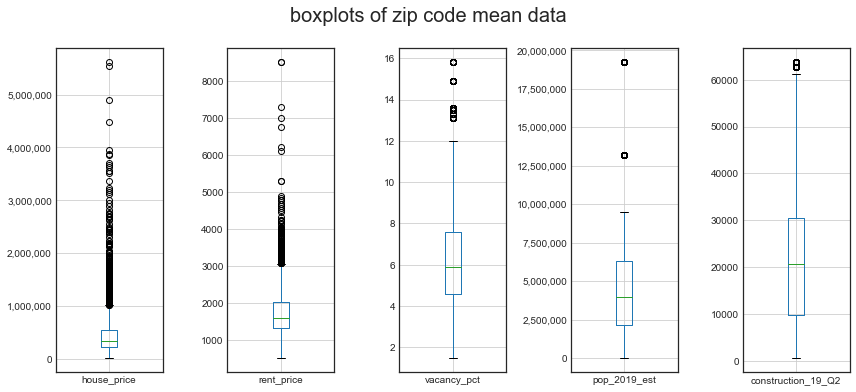

In [22]:
fig, axs = plot_subgroup_hist(agg_zip, cols, 'boxplots of zip code mean data');  

In [23]:
# discard when zip code CV > 20% ?

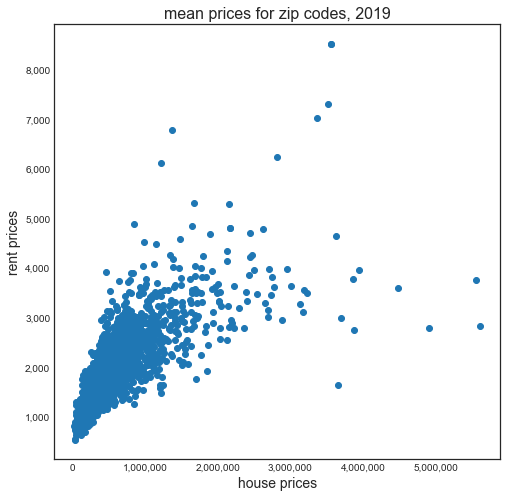

In [24]:
fig, ax = scatter(agg_zip.df,'house_price', 'rent_price', 'mean prices for zip codes, 2019', 'house prices', 'rent prices')

# Examine by CBSA

In [25]:
agg_CBSA = dataobj.agg_by_CBSA()

In [26]:
agg_CBSA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CBSA                140 non-null    object 
 1   CBSA_type           140 non-null    object 
 2   CBSA_name           140 non-null    object 
 3   state               140 non-null    object 
 4   house_price         140 non-null    float64
 5   house_priceSD       140 non-null    float64
 6   rent_price          140 non-null    float64
 7   rent_priceSD        140 non-null    float64
 8   zip_codes           140 non-null    int64  
 9   pop_2019_est        140 non-null    int64  
 10  vacancy_pct         90 non-null     float64
 11  construction_19_Q2  90 non-null     float64
 12  rent_pct            140 non-null    float64
 13  rent_CV             140 non-null    float64
dtypes: float64(8), int64(2), object(4)
memory usage: 15.4+ KB


This is a pd object from 2019 with: None

## CBSA tables

In [27]:
## top 5 CBSAs by rent pct
top5CBSA = agg_CBSA.df.loc[:,['CBSA_name', 'zip_codes', 'house_price', 'rent_price', 'rent_pct']].sort_values(by='rent_pct', ascending=False).head(5)
top5CBSA = top5CBSA.round(2)
top5CBSA

,CBSA_name,zip_codes,house_price,rent_price,rent_pct
125,"Toledo, OH",12,"62,290.6700",822.2500,1.3200
123,"Syracuse, NY",11,"145,406.9100","1,306.8200",0.9000
63,"Little Rock-North Little Rock-Conway, AR",47,"88,210.0000",758.4500,0.8600
67,"Memphis, TN-MS-AR",36,"154,579.9700","1,300.3600",0.8400
35,"Dayton-Kettering, OH",98,"105,751.4800",878.2600,0.8300


In [28]:
# save as markdown for readme
print(top5CBSA.to_markdown(showindex=False, floatfmt=",.2f", numalign="right"))

| CBSA_name                                |   zip_codes |   house_price |   rent_price |   rent_pct |
|:-----------------------------------------|------------:|--------------:|-------------:|-----------:|
| Toledo, OH                               |          12 |     62,290.67 |       822.25 |       1.32 |
| Syracuse, NY                             |          11 |    145,406.91 |     1,306.82 |       0.90 |
| Little Rock-North Little Rock-Conway, AR |          47 |     88,210.00 |       758.45 |       0.86 |
| Memphis, TN-MS-AR                        |          36 |    154,579.97 |     1,300.36 |       0.84 |
| Dayton-Kettering, OH                     |          98 |    105,751.48 |       878.26 |       0.83 |


In [29]:
#agg_CBSA.save('CBSAdata')

## histograms box plots of rent, home, vacancy and construction by CBSA

In [30]:
# vars to plot
cols = ['house_price', 'rent_price', 'vacancy_pct', 'pop_2019_est', 'construction_19_Q2']

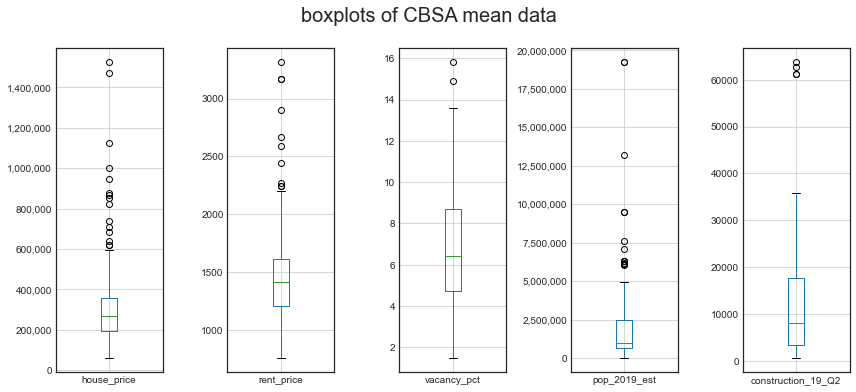

In [31]:
fig, axs = plot_subgroup_hist(agg_CBSA, cols, 'boxplots of CBSA mean data');  

In [32]:
# save it
#fig.savefig('../output/plots/CBSA_boxplots.png')

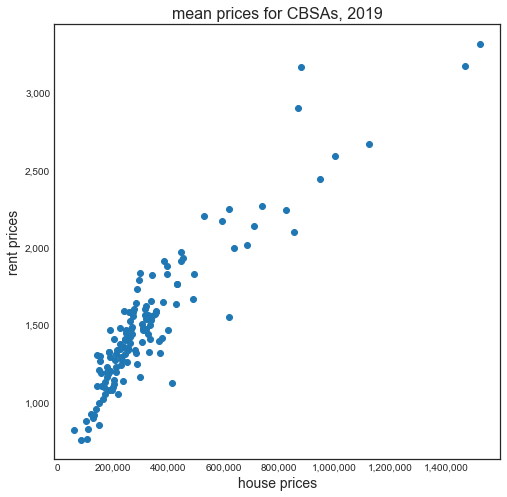

In [33]:
fig, ax = scatter(agg_CBSA.df,'house_price', 'rent_price', 'mean prices for CBSAs, 2019', 'house prices', 'rent prices')
fig.savefig('../output/plots/CBSA_scatter.png')

In [34]:
agg_CBSA.get_corr()

,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct,rent_CV
house_price,1.00,0.82,0.92,0.61,0.41,0.38,-0.36,0.32,-0.75,0.27
house_priceSD,0.82,1.00,0.76,0.82,0.57,0.52,-0.28,0.39,-0.53,0.57
rent_price,0.92,0.76,1.00,0.66,0.41,0.37,-0.38,0.40,-0.67,0.30
rent_priceSD,0.61,0.82,0.66,1.00,0.50,0.45,-0.32,0.38,-0.44,0.86
zip_codes,0.41,0.57,0.41,0.50,1.00,0.73,-0.15,0.68,-0.36,0.43
pop_2019_est,0.38,0.52,0.37,0.45,0.73,1.00,-0.24,0.78,-0.31,0.35
vacancy_pct,-0.36,-0.28,-0.38,-0.32,-0.15,-0.24,1.00,-0.09,0.29,-0.15
construction_19_Q2,0.32,0.39,0.40,0.38,0.68,0.78,-0.09,1.00,-0.38,0.19
rent_pct,-0.75,-0.53,-0.67,-0.44,-0.36,-0.31,0.29,-0.38,1.00,-0.25
rent_CV,0.27,0.57,0.30,0.86,0.43,0.35,-0.15,0.19,-0.25,1.00


# Examine by State

In [35]:
agg_State = dataobj.agg_by_state()

In [36]:
agg_State.df.head()

,state,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct
0,AL,"229,471.5472","103,243.0684","1,294.5000",333.7970,106,"1,090,435.0000",13.5000,"3,202.0000",0.5641
1,AR,"88,210.0000","47,322.5174",758.4468,162.7437,47,"742,384.0000",9.8000,"3,005.0000",0.8598
2,AZ,"312,645.3700","164,803.1135","1,406.6715",308.0949,1519,"4,170,072.6695",6.0987,"29,577.6215",0.4499
3,CA,"907,973.4487","656,922.6181","2,489.1409",861.1497,6067,"7,621,179.5644",4.7073,"19,928.0534",0.2741
4,CO,"468,613.2381","165,913.5815","1,779.2809",302.7524,1214,"2,098,700.4794",4.4000,"19,308.0000",0.3797


In [37]:
agg_State

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               43 non-null     object 
 1   house_price         43 non-null     float64
 2   house_priceSD       43 non-null     float64
 3   rent_price          43 non-null     float64
 4   rent_priceSD        43 non-null     float64
 5   zip_codes           43 non-null     int64  
 6   pop_2019_est        43 non-null     float64
 7   vacancy_pct         41 non-null     float64
 8   construction_19_Q2  41 non-null     float64
 9   rent_pct            43 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 3.5+ KB


This is a pd object from 2019 with: None

In [38]:
#agg_State.save('statedata')

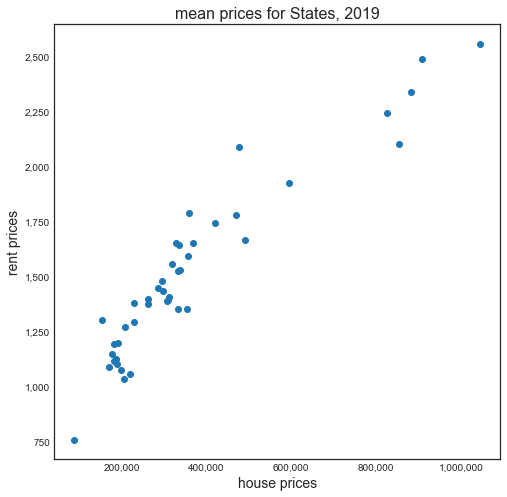

In [39]:
fig, ax = scatter(agg_State.df,'house_price', 'rent_price', 'mean prices for States, 2019', 'house prices', 'rent prices')

In [40]:
agg_State.get_corr()

,house_price,house_priceSD,rent_price,rent_priceSD,zip_codes,pop_2019_est,vacancy_pct,construction_19_Q2,rent_pct
house_price,1.00,0.85,0.94,0.74,0.37,0.53,-0.50,0.46,-0.85
house_priceSD,0.85,1.00,0.84,0.89,0.51,0.63,-0.35,0.52,-0.64
rent_price,0.94,0.84,1.00,0.79,0.48,0.64,-0.48,0.57,-0.80
rent_priceSD,0.74,0.89,0.79,1.00,0.54,0.65,-0.32,0.46,-0.58
zip_codes,0.37,0.51,0.48,0.54,1.00,0.38,-0.10,0.47,-0.30
pop_2019_est,0.53,0.63,0.64,0.65,0.38,1.00,-0.33,0.82,-0.37
vacancy_pct,-0.50,-0.35,-0.48,-0.32,-0.10,-0.33,1.00,-0.26,0.58
construction_19_Q2,0.46,0.52,0.57,0.46,0.47,0.82,-0.26,1.00,-0.43
rent_pct,-0.85,-0.64,-0.80,-0.58,-0.30,-0.37,0.58,-0.43,1.00


# map CBSAs with states in background together

In [42]:
# here is the background us states?
fp = '../data/tl_2019_us_state/tl_2019_us_state.shp'
map_states = gpd.read_file(fp)

In [43]:
map_states = map_states[map_states['REGION'] != '9']

In [44]:
map_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [45]:
# sure there is a better way but for now.. to make the maps bigger
map_states = map_states[map_states['STUSPS'] != 'AK']
map_states = map_states[map_states['STUSPS'] != 'HI']

In [46]:
# set the filepath and load in a shapefile
fp = '../data/tl_2019_us_cbsa/tl_2019_us_cbsa.shp'
map_df = gpd.read_file(fp)
map_df['CBSAFP'] = map_df['CBSAFP'].astype(str)

In [47]:
agg_CBSA_mapdf = gpd.pd.merge(map_df, agg_CBSA.df, left_on = 'CBSAFP', right_on = 'CBSA')

In [48]:
agg_CBSA_mapdf = agg_CBSA_mapdf[agg_CBSA_mapdf['state'] != 'AK']
agg_CBSA_mapdf = agg_CBSA_mapdf[agg_CBSA_mapdf['state'] != 'HI']

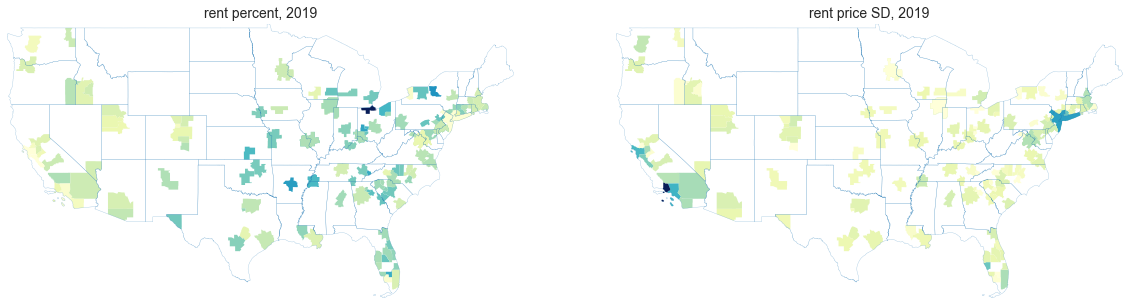

In [49]:
fig, axs = plt.subplots(1,2, figsize=(20, 10))
ax.set_aspect('equal')
map_states.geometry.boundary.plot(color=None, alpha = .5, ax=axs[0], linewidth=0.3)
map_states.geometry.boundary.plot(color=None, alpha = .5, ax=axs[1], linewidth=0.3)

agg_CBSA_mapdf.plot(column='rent_pct', cmap='YlGnBu', ax=axs[0], linewidth = 0.8)
agg_CBSA_mapdf.plot(column='rent_priceSD', cmap='YlGnBu', ax=axs[1], linewidth = 0.8)

xlim = ([map_states.total_bounds[0],  map_states.total_bounds[2]])
ylim = ([map_states.total_bounds[1],  map_states.total_bounds[3]])

axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)
axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)

axs[0].set_title('rent percent, 2019', x=0.5, y=1.08, fontsize=14)
axs[1].set_title('rent price SD, 2019', x=0.5, y=1.08, fontsize=14)
axs[0].axis('off')
axs[1].axis('off')
fig.savefig('../output/plots/rent_maps.png')

# map state with heat map

In [50]:
agg_State_mapdf = gpd.pd.merge(map_states, agg_State.df, left_on = 'STUSPS', right_on = 'state')

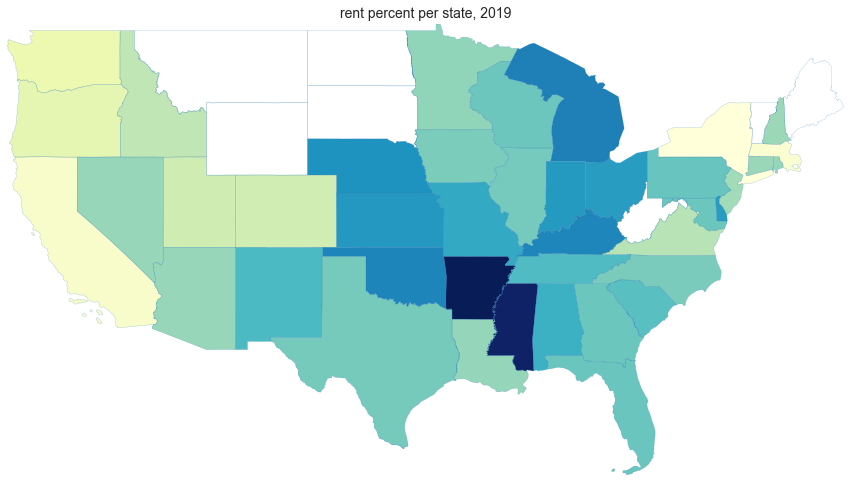

In [51]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_aspect('equal')
map_states.geometry.boundary.plot(color=None, alpha = .5, ax=ax, linewidth=0.3)
agg_State_mapdf.plot(column='rent_pct', cmap='YlGnBu', ax=ax, linewidth = 0.8)

xlim = ([map_states.total_bounds[0],  map_states.total_bounds[2]])
ylim = ([map_states.total_bounds[1],  map_states.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_title('rent percent per state, 2019', x=0.5, y=1.2, fontsize=14)
ax.axis('off')
fig.savefig('../output/plots/state_map.png')